## Sentiment Analysis

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import spacy

# Load datasets
imdb_data = pd.read_csv("IMDB Dataset.csv")

# Sample subset of IMDb dataset
imdb_data_subset = imdb_data.sample(frac=0.1, random_state=42)

# Data preprocessing
imdb_data_subset['sentiment'] = imdb_data_subset['sentiment'].map({'positive': 1, 'negative': 0})

# Split IMDb data for training
X_train, X_val, y_train, y_val = train_test_split(imdb_data_subset['review'], imdb_data_subset['sentiment'], test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes model
vectorizer_nb = CountVectorizer(stop_words='english')
X_train_vect_nb = vectorizer_nb.fit_transform(X_train)
X_val_vect_nb = vectorizer_nb.transform(X_val)

clf_nb = MultinomialNB()
clf_nb.fit(X_train_vect_nb, y_train)

# Train Support Vector Machines (SVM) model
vectorizer_svm = CountVectorizer(stop_words='english')
X_train_vect_svm = vectorizer_svm.fit_transform(X_train)
X_val_vect_svm = vectorizer_svm.transform(X_val)

clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train_vect_svm, y_train)

# Evaluate models
accuracy_nb = accuracy_score(y_val, clf_nb.predict(X_val_vect_nb))
accuracy_svm = accuracy_score(y_val, clf_svm.predict(X_val_vect_svm))

print("Multinomial Naive Bayes Validation Accuracy:", accuracy_nb)
print("Support Vector Machines (SVM) Validation Accuracy:", accuracy_svm)

# Load test dataset
test_data = pd.read_csv("sentiment-topic-test.tsv", sep='\t')
test_data['text'] = test_data['text'].str.lower()

# Named Entity Recognition
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

test_data['named_entities'] = test_data['text'].apply(extract_named_entities)

# Topic identification based on NEs
def identify_topic(named_entities):
    topics = []
    for entity in named_entities:
        # Logic to identify topics based on named entities
        # Example: If 'person' named entity is present, it could be related to 'people'
        if 'person' in entity:
            topics.append('people')
        # Similarly, other conditions can be added based on specific named entities
        # Add more conditions as per requirement
    return topics

test_data['topic'] = test_data['named_entities'].apply(identify_topic)

# Classification report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(sentiment_labels, predicted_sentiment_nb, digits=4))

# Classification report for Support Vector Machines (SVM)
print("\nClassification Report for Support Vector Machines (SVM):")
print(classification_report(sentiment_labels, predicted_sentiment_svm, digits=4))


# Analysis
# Error analysis 


# Predict sentiment for test dataset using both models
X_test_vect_nb = vectorizer_nb.transform(test_data['text'])
test_data['predicted_sentiment_nb'] = clf_nb.predict(X_test_vect_nb)

X_test_vect_svm = vectorizer_svm.transform(test_data['text'])
test_data['predicted_sentiment_svm'] = clf_svm.predict(X_test_vect_svm)

# Error Analysis for Multinomial Naive Bayes
errors_nb = test_data[test_data['sentiment'] != test_data['predicted_sentiment_nb']]

print("Multinomial Naive Bayes Errors:")
print(errors_nb[['text', 'sentiment', 'predicted_sentiment_nb']])
print()

# Error Analysis for Support Vector Machines (SVM)
errors_svm = test_data[test_data['sentiment'] != test_data['predicted_sentiment_svm']]

print("Support Vector Machines (SVM) Errors:")
print(errors_svm[['text', 'sentiment', 'predicted_sentiment_svm']])


from sklearn.metrics import classification_report

# Convert predicted sentiment values to strings
test_data['predicted_sentiment_nb'] = test_data['predicted_sentiment_nb'].map({0: 'negative', 1: 'positive'})
test_data['predicted_sentiment_svm'] = test_data['predicted_sentiment_svm'].map({0: 'negative', 1: 'positive'})

# Flatten the sentiment labels and predicted sentiment labels
sentiment_labels = test_data['sentiment'].values
predicted_sentiment_nb = test_data['predicted_sentiment_nb'].values
predicted_sentiment_svm = test_data['predicted_sentiment_svm'].values





Multinomial Naive Bayes Validation Accuracy: 0.825
Support Vector Machines (SVM) Validation Accuracy: 0.828
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

    negative     0.4000    0.5000    0.4444         4
     neutral     0.0000    0.0000    0.0000         3
    positive     0.2000    0.3333    0.2500         3

    accuracy                         0.3000        10
   macro avg     0.2000    0.2778    0.2315        10
weighted avg     0.2200    0.3000    0.2528        10


Classification Report for Support Vector Machines (SVM):
              precision    recall  f1-score   support

    negative     0.3333    0.2500    0.2857         4
     neutral     0.0000    0.0000    0.0000         3
    positive     0.4286    1.0000    0.6000         3

    accuracy                         0.4000        10
   macro avg     0.2540    0.4167    0.2952        10
weighted avg     0.2619    0.4000    0.2943        10

Multinomial Naive Bayes Errors:
 

c:\Users\Anand Manukumar Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anand Manukumar Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anand Manukumar Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

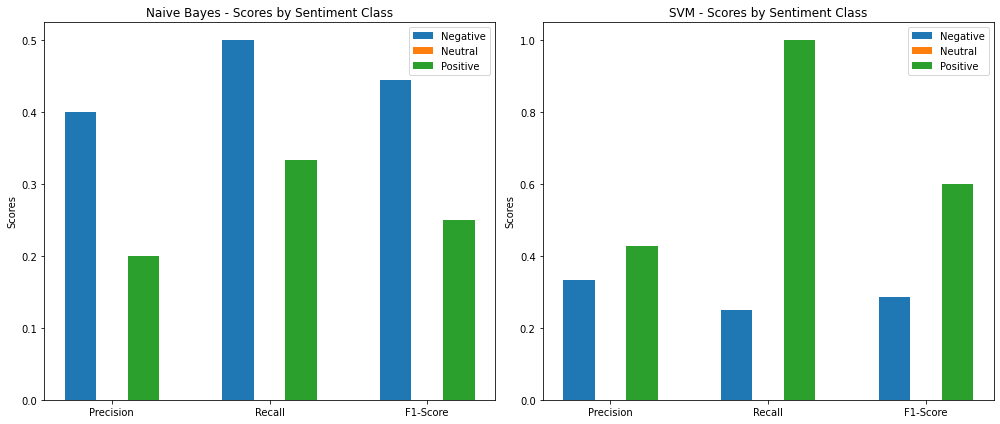

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report strings
classification_report_nb = """
              precision    recall  f1-score   support

    negative     0.4000    0.5000    0.4444         4
     neutral     0.0000    0.0000    0.0000         3
    positive     0.2000    0.3333    0.2500         3

    accuracy                         0.3000        10
   macro avg     0.2000    0.2778    0.2315        10
weighted avg     0.2200    0.3000    0.2528        10
"""

classification_report_svm = """
              precision    recall  f1-score   support

    negative     0.3333    0.2500    0.2857         4
     neutral     0.0000    0.0000    0.0000         3
    positive     0.4286    1.0000    0.6000         3

    accuracy                         0.4000        10
   macro avg     0.2540    0.4167    0.2952        10
weighted avg     0.2619    0.4000    0.2943        10
"""

# Function to extract precision, recall, and f1-score from classification report string
def extract_scores(classification_report_str):
    lines = classification_report_str.split('\n')
    scores = {}
    for line in lines[2:-5]:
        parts = line.split()
        if parts:  # Check if line is not empty
            label = parts[0]
            precision = float(parts[1])
            recall = float(parts[2])
            f1_score = float(parts[3])
            scores[label] = [precision, recall, f1_score]
    return scores

# Extract scores for Naive Bayes
scores_nb = extract_scores(classification_report_nb)

# Extract scores for SVM
scores_svm = extract_scores(classification_report_svm)

# Plot the histograms for Naive Bayes
labels = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Naive Bayes
rects1 = ax[0].bar(x - width, [scores_nb['negative'][i] for i in range(3)], width, label='Negative')
rects2 = ax[0].bar(x, [scores_nb['neutral'][i] for i in range(3)], width, label='Neutral')
rects3 = ax[0].bar(x + width, [scores_nb['positive'][i] for i in range(3)], width, label='Positive')

ax[0].set_ylabel('Scores')
ax[0].set_title('Naive Bayes - Scores by Sentiment Class')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# SVM
rects1 = ax[1].bar(x - width, [scores_svm['negative'][i] for i in range(3)], width, label='Negative')
rects2 = ax[1].bar(x, [scores_svm['neutral'][i] for i in range(3)], width, label='Neutral')
rects3 = ax[1].bar(x + width, [scores_svm['positive'][i] for i in range(3)], width, label='Positive')

ax[1].set_ylabel('Scores')
ax[1].set_title('SVM - Scores by Sentiment Class')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

fig.tight_layout()

plt.show()
